In [95]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [96]:
df=pd.read_csv("internship.csv")

In [97]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [98]:
df.drop("Unnamed: 0",axis=1,inplace=True)
#dropping unnamed column as it is the index column 

There are no null values so we will now visualise our data set

In [101]:
df['pdate'] = pd.to_datetime(df['pdate'])
#converting the object data type to date time
df['year'] = df['pdate'].dt.year
df['month'] = df['pdate'].dt.month

#subsequently splitting it into year and month

In [102]:
df.drop(["pdate"],axis=1,inplace=True)

In [103]:
df.drop(["msisdn"],axis=1,inplace=True)

In [104]:
columns=df.columns
for i in columns:
    count=len(df[i].unique())
    if count<=1:
        print(i,":",count)
        
#created a function to find out count of unique values , pcircle and year has only one value throughtout so we can drop it.

pcircle : 1
year : 1


In [105]:
df.drop(["pcircle","year"],axis=1,inplace=True)

In [106]:
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.97:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
    #creating a loop to find out the highly correlated variables and then drop them as the data then will be redundant
    #we have set the correlation value as 0.95 ,if two columns have correlation more than this then that will be printed

In [107]:
print(correlated_features)
#we can drop these columns as they have high correlation

{'daily_decr90'}


In [108]:
df.drop(["daily_decr90"],axis=1,inplace=True)

In [109]:
df.shape

(209593, 33)

In [110]:
print(df[df<0].count())
for i in df.columns:
    df[i] = df[i].abs()


label                      0
aon                     1539
daily_decr30            1839
rental30                5628
rental90                5929
last_rech_date_ma       1315
last_rech_date_da         14
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1730
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
month                      0
dtype: int64


In [112]:
for i in df.columns:
    df[i] = df[i].abs()
print(df[df<0].count())


label                   0
aon                     0
daily_decr30            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
month                   0
dtype: int64


In [15]:
corr_matrix=df.corr()
corr_matrix["label"].sort_values(ascending=False)


label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
month                   0.005093
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  int64  
 8   cnt_ma_rech30         209593 non-null  int64  
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  medianmarechprebal30  209593 non-null  float64
 13  cnt_ma_rech90         209593 non-null  int64  
 14  fr_ma_rech90          209593 non-null  int64  
 15  

# Visualization

In [114]:
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

Random under-sampling:
1    183431
0     26162
Name: label, dtype: int64


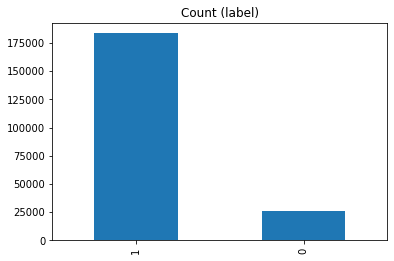

In [115]:
df_test_under = pd.concat([df_class_0, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.label.value_counts())

df_test_under.label.value_counts().plot(kind='bar', title='Count (label)');

label
0    1272.376756
1    5967.455497
Name: daily_decr30, dtype: float64


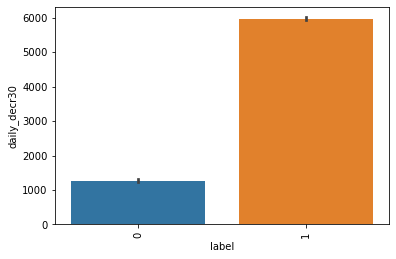

In [122]:
plt.xlabel("label", fontsize=10)
plt.ylabel("daily_decr30", fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
sns.barplot(x="label",y="daily_decr30",data=df)
print(df.groupby("label").daily_decr30.mean())

Observation:

The people who have daily amount spent from main account frequently have paid the loan more easily.

label
0    2329.486376
1    3647.985363
Name: rental90, dtype: float64


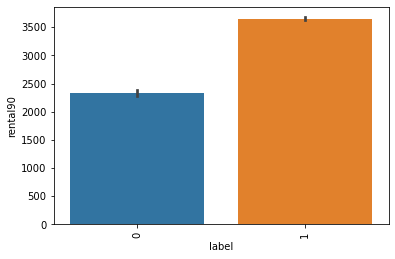

In [121]:
plt.xlabel("label", fontsize=10)
plt.ylabel("rental90", fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
sns.barplot(x="label",y="rental90",data=df)
print(df.groupby("label").rental90.mean())

Observation:

The people with more average main account balance over last 90 days have higher capacity of paying the loan easily.

label
0    3223.694134
1    3831.746662
Name: last_rech_date_ma, dtype: float64


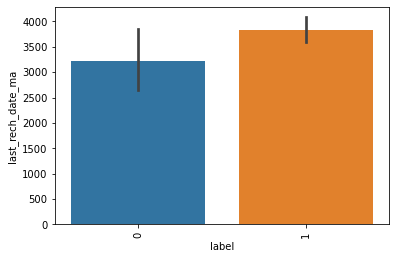

In [126]:
plt.xlabel("label", fontsize=10)
plt.ylabel("last_rech_date_ma", fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
sns.barplot(x="label",y="last_rech_date_ma",data=df)
print(df.groupby("label").last_rech_date_ma.mean())

label
0    3470.381002
1    3746.692974
Name: last_rech_date_da, dtype: float64


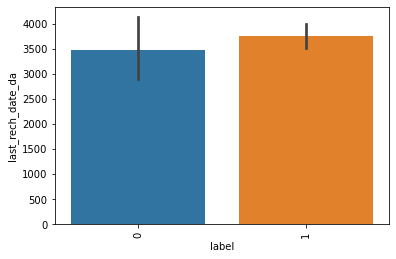

In [128]:
plt.xlabel("label", fontsize=10)
plt.ylabel("last_rech_date_da", fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
sns.barplot(x="label",y="last_rech_date_da",data=df)
print(df.groupby("label").last_rech_date_da.mean())

label
0    0.038338
1    0.041945
Name: cnt_da_rech90, dtype: float64


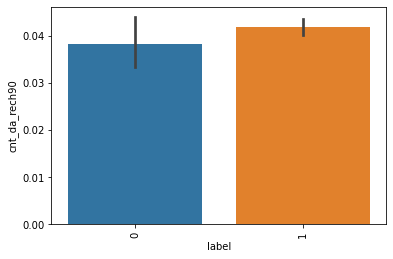

In [129]:
plt.xlabel("label", fontsize=10)
plt.ylabel("cnt_da_rech90", fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
sns.barplot(x="label",y="cnt_da_rech90",data=df)
print(df.groupby("label").cnt_da_rech90.mean())

In [ ]:
fr_ma_rech90

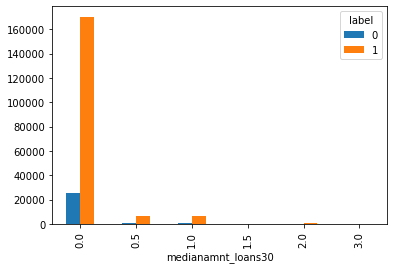

In [35]:
pd.crosstab(df.medianamnt_loans30,df["label"]).plot(kind='bar')


Observation:

For the one paying loan easily ,the median amount of loan taken within 30 days is more

In [ ]:
medianamnt_loans30 

In [46]:
print(df.medianamnt_loans30.max(),",",df.medianamnt_loans30.min())

3.0 , 0.0


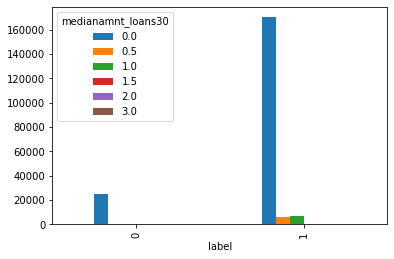

In [48]:
ax=pd.crosstab(df.label,df.medianamnt_loans30).plot(kind='bar')


Observation:
    
The median amount of loan taken by user in last 30 days is mostly zero for both the one who payed the loan on time and for the one who did not payed the loan on time.

99864.56086 , 0.0


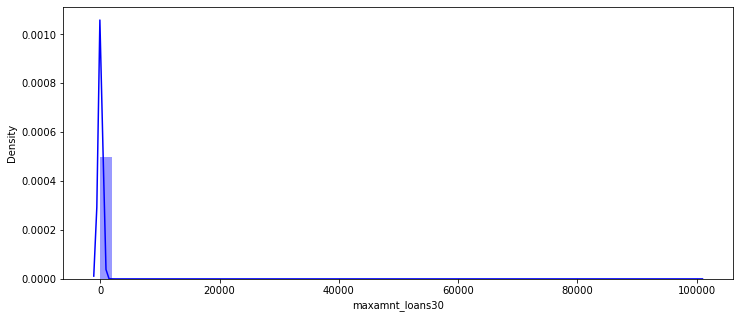

In [41]:
plt.figure(figsize=(12,5))
sns.distplot(df["maxamnt_loans30"], color = 'b')
print(df.maxamnt_loans30.max(),",",df.maxamnt_loans30.min())

In [42]:
(df["maxamnt_loans30"]==0).count()

209593

Observation:
    
Fromthe abve we can see that the maximum loan amount taken within 30 days is 99864.56086 and minimum amount is 0.0 .Also a lot of peoople have not taken no loan within that time period

label
0     9.642382
1    25.642590
Name: amnt_loans90, dtype: float64


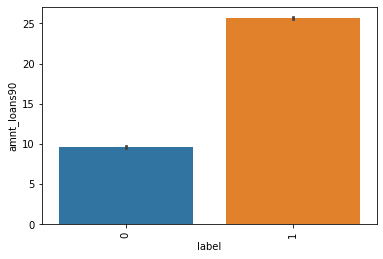

In [49]:
plt.xlabel("label", fontsize=10)
plt.ylabel("amnt_loans90", fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
sns.barplot(x="label",y="amnt_loans90",data=df)
print(df.groupby("label").amnt_loans90.mean())

Observation:
    
This depicts that people who have taken loan within the last 90 days are more prone of returning he loan within the required time.


In [51]:
print(df.amnt_loans90.max(),",",df.amnt_loans90.min())
From this we can see that the maximum amount of loan taken by the yser in last 90 days is 438 and minimum is 0.


438 , 0


label
0    271.873754
1    275.055959
Name: maxamnt_loans30, dtype: float64


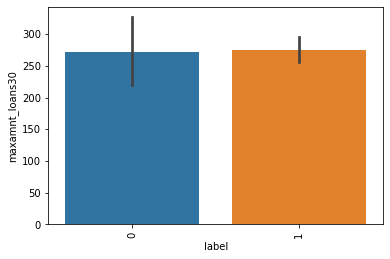

In [50]:
plt.xlabel("label", fontsize=10)
plt.ylabel("maxamnt_loans30", fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0,fontsize=10)
sns.barplot(x="label",y="maxamnt_loans30",data=df)
print(df.groupby("label").maxamnt_loans30.mean())

Observation:

The one paying loan and the one not paying have both have same frequency for the maximum amount of loan user took as a lot of people had nt taken any loan..

64 , 0


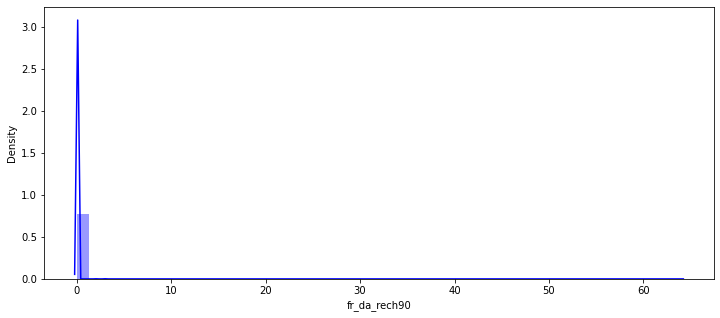

In [55]:
plt.figure(figsize=(12,5))
sns.distplot(df["fr_da_rech90"], color = 'b')
print(df.fr_da_rech90.max(),",",df.fr_da_rech90.min())

Observation:

From the above it is clear that a huge chunk of peple have not recharged datawithin last 90 days

In [116]:
x_re=df.drop("label",axis=1)
y=df["label"]

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score


In [119]:
from numpy import where
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, Y = undersample.fit_resample(x_re, y)
# summarize the new class distribution

print(format(Counter(y)))
print(format(Counter(Y)))

# scatter plot of examples by class label


Counter({1: 183431, 0: 26162})
Counter({0: 26162, 1: 26162})


In [120]:
output=pd.DataFrame(Y)
df_class_0_= output[output['label'] == 0]
df_class_1_ = output[output['label'] == 1]

Random under-sampling:
1    26162
0    26162
Name: label, dtype: int64


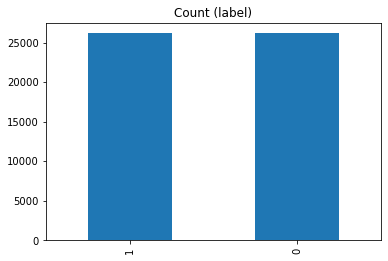

In [121]:
df_test_under_ = pd.concat([df_class_0_, df_class_1_], axis=0)

print('Random under-sampling:')
print(df_test_under_.label.value_counts())

df_test_under_.label.value_counts().plot(kind='bar', title='Count (label)');

In [122]:
print(df.shape)

(209593, 33)


In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
x=sc.transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [124]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,Y,random_state = 47,test_size=0.20)


In [125]:
model=[LogisticRegression(),DecisionTreeClassifier()]
for m in model:
    m.fit(X_train,Y_train)
    predm=m.predict(X_test)
    print("Score of",m,"is",accuracy_score(Y_test,predm))
    print("Cross val score:",cross_val_score(m,x,Y,cv=5,scoring="accuracy").mean())
    print("\n")

Score of LogisticRegression() is 0.7325370281892021
Cross val score: 0.7088318988882412


Score of DecisionTreeClassifier() is 0.8097467749641662
Cross val score: 0.7481648910523063




In [126]:
model1=[RandomForestClassifier(),KNeighborsClassifier()]
for m in model1:
    m.fit(X_train,Y_train)
    predm=m.predict(X_test)
    print("Score of",m,"is",accuracy_score(Y_test,predm))
    print("Cross val score:",cross_val_score(m,x,Y,cv=5,scoring="accuracy").mean())
    print("\n")

Score of RandomForestClassifier() is 0.8668896321070234
Cross val score: 0.7921406855675902


Score of KNeighborsClassifier() is 0.7687529861442904
Cross val score: 0.6986666253902991




In [86]:
from sklearn.ensemble import AdaBoostClassifier

adb=AdaBoostClassifier(base_estimator=rfc,n_estimators=200,random_state=42,algorithm="SAMME")
adb.fit(X_train,Y_train)
predab=adb.predict(X_test)
print("Score is",accuracy_score(Y_test,predab))
print("Cross val score:",cross_val_score(adb,x,Y,cv=5,scoring="accuracy").mean())

Score is 0.8687052078356426
Cross val score: 0.7965937645654438


In [85]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("classification report \n",classification_report(Y_test,predab))

classification report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      5138
           1       0.86      0.89      0.87      5327

    accuracy                           0.87     10465
   macro avg       0.87      0.87      0.87     10465
weighted avg       0.87      0.87      0.87     10465



Confusion matrix:
 [[4366  772]
 [ 602 4725]]


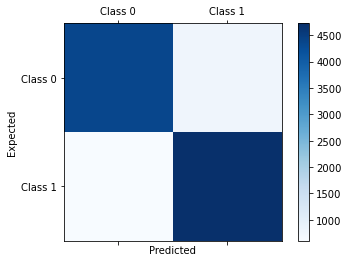

In [90]:
conf_mat = confusion_matrix(y_true=Y_test, y_pred=predab)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

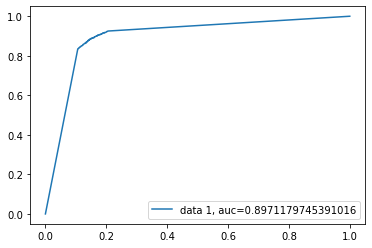

In [91]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_proba = adb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()